# Defining Objective and setting up context
Objective: Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 
 
Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities. 
 

### Github URL: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-sgupta78/Module 6

### Load basic modules for exploratory data analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

### Load data file

In [2]:
bankdf = pd.read_csv('bank.csv')
bankdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop columns which are unique and don't contribute in prediction


In [3]:
bankdf.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [4]:
bankdf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bankdf.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [6]:
bankdf.isna().any().any()

False

It shows that there is no null values in the dataset

In [7]:
bankdf.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Converting HasCrCard and IsActiveMember as category datatype as part of <b> second pass </b> to see if Accuracy can be improved. However didn't see any improvement.



In [8]:
bankdf['HasCrCard'] = bankdf['HasCrCard'].astype('category')
bankdf['IsActiveMember'] = bankdf['IsActiveMember'].astype('category')
bankdf.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [9]:
bankdf.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


## The last column, named Exited, is target variable whereas rest other columns are features which will be used to to predict the target variable

### Let's generate pair plot to see the relationship among various features and with target variable


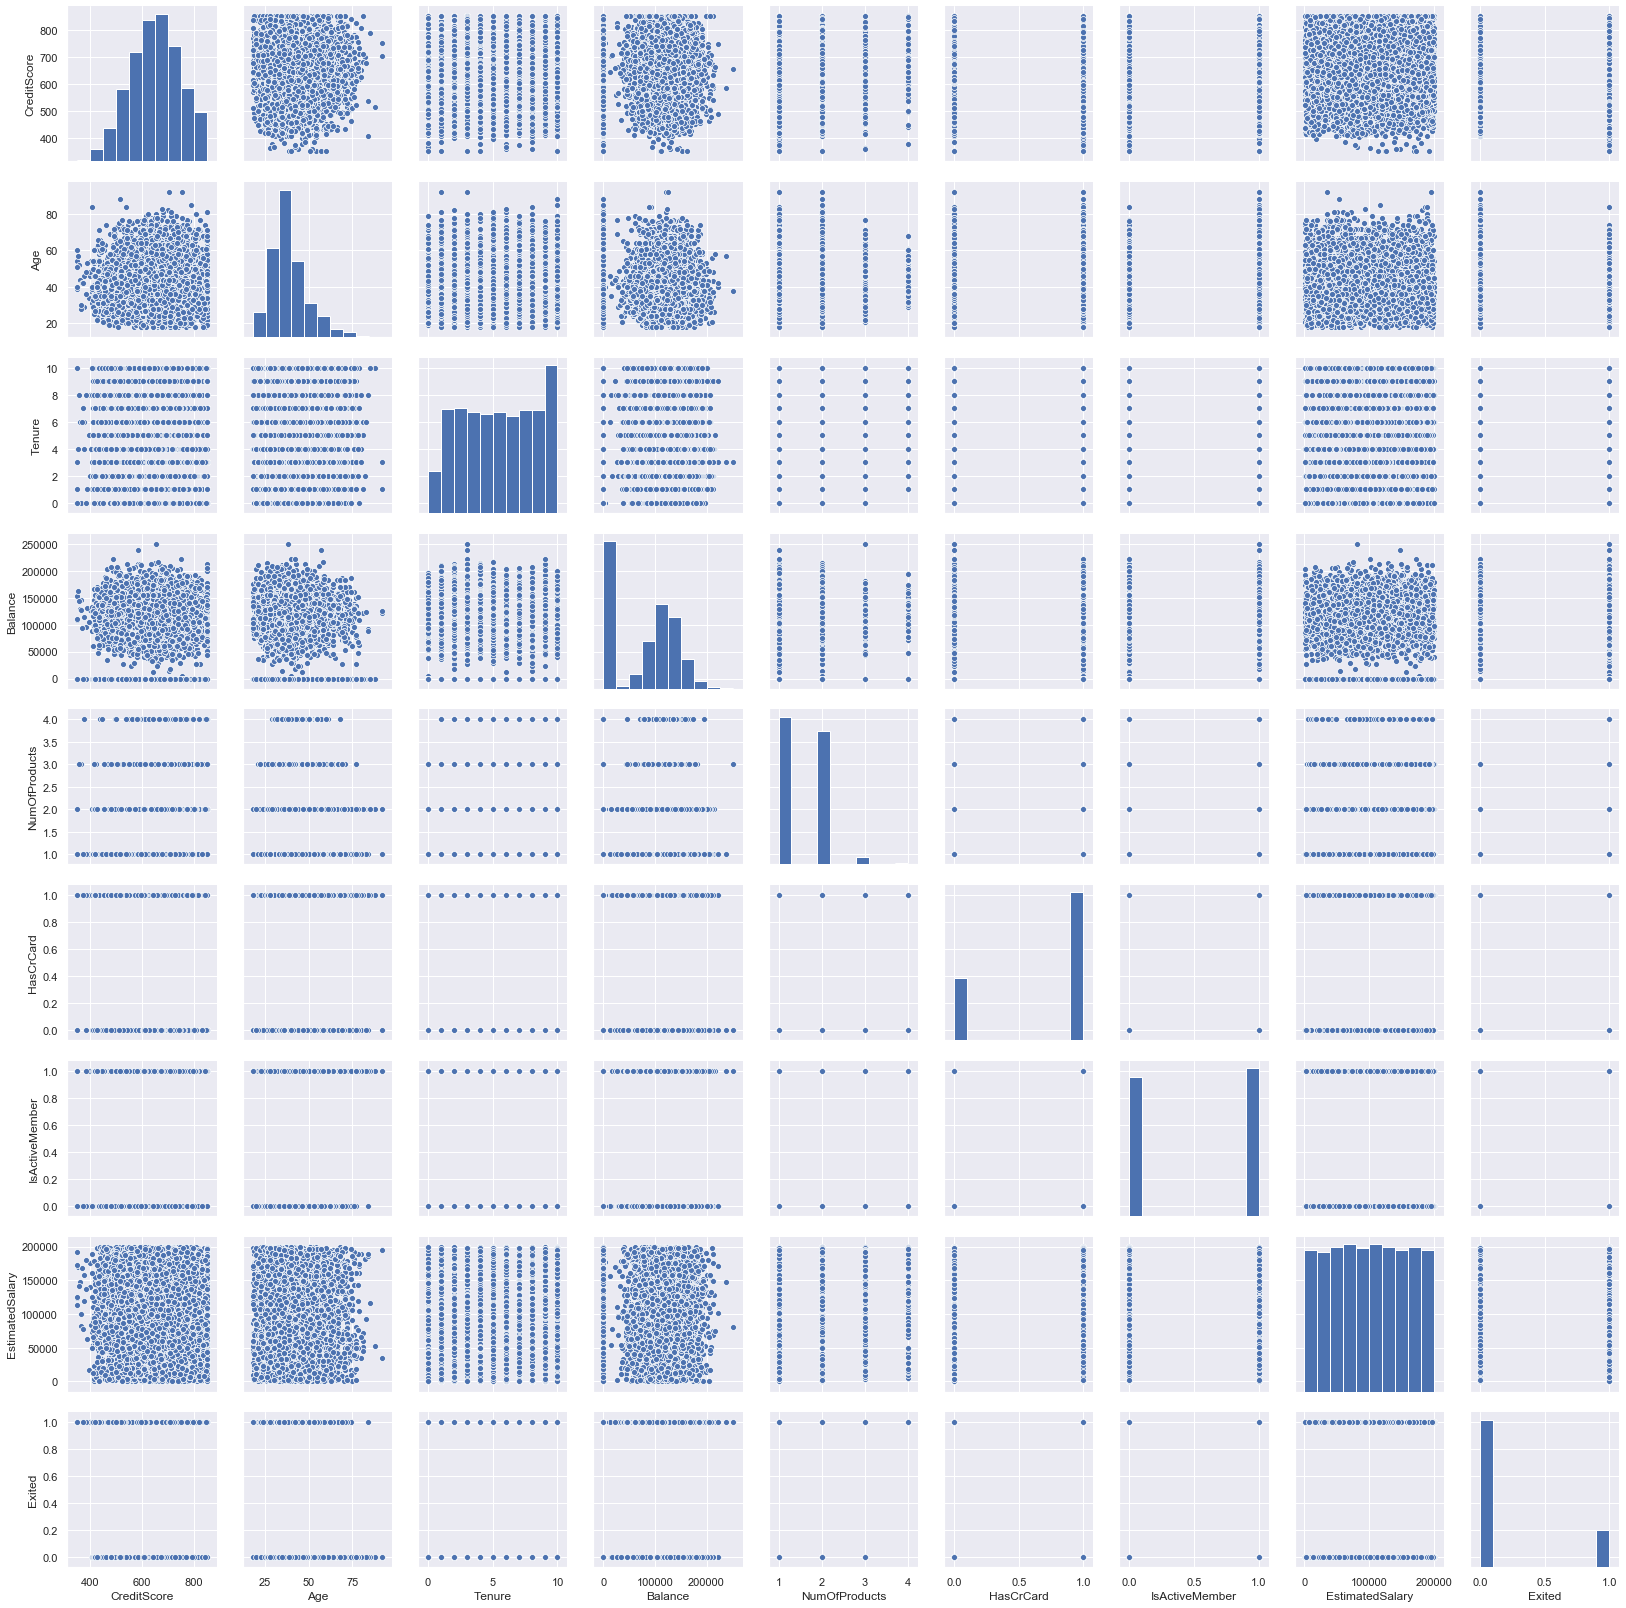

In [10]:
sns.pairplot(bankdf)

We don't see any significance relationships among variables

In [98]:
df=pd.get_dummies(bankdf, drop_first=True)

In [99]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


In [100]:
print(bankdf.shape)
print(df.shape)

(10000, 11)
(10000, 12)


## Let's divide the data into training and test sets

In [101]:
from sklearn.model_selection import train_test_split


In [102]:
target = df['Exited']

In [103]:
features = df.drop('Exited', axis=1)


In [104]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [105]:
features.shape

(10000, 11)

In [106]:
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


In [107]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=3)

In [108]:
x_train.shape
features.shape

(10000, 11)

## Let's normalize the test and test data

In [109]:
from sklearn import preprocessing

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   EstimatedSalary    10000 non-null  float64
 6   Exited             10000 non-null  int64  
 7   Geography_Germany  10000 non-null  uint8  
 8   Geography_Spain    10000 non-null  uint8  
 9   Gender_Male        10000 non-null  uint8  
 10  HasCrCard_1        10000 non-null  uint8  
 11  IsActiveMember_1   10000 non-null  uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 595.8 KB


In [111]:
x_train_n=preprocessing.normalize(x_train)
x_test_n = preprocessing.normalize(x_test)

print(x_train_n.shape)
print(x_test_n.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


## Create Artificial Neural Network Model 

Let's use Sequential API from Keras to create the layered network

The probelm in context has binary output hence we will use Sigmoid activation fucntion at the output layer

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [113]:
tf.__version__

'2.3.0'

In [114]:
model = Sequential()

### Let's add layers and we will use RelU activation function for hidden layers and Sigmoid at output layer


In [115]:
model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile Model
#### Keras model needs to be compiled before it can be trained.
#### We specifiy loss fucntion and optimization function as part of compilation step



In [116]:
# Let's use Adam optimazation fucntion with learning rate as 0.001

opt = optimizers.Adam(lr=0.001)

In [117]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Generate summary of the model


In [118]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


### Training (Forward pass and Backpropogation)



In [119]:
model.fit(x_train_n, y_train.values, batch_size=500, epochs=5, verbose=1)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7928
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7941
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7947
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7947
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7947


### Perform Model Evaluation
Evaluation results are returned as list


In [120]:
result = model.evaluate(x_test_n, y_test.values)

63/63 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8025


In [121]:
print(model.metrics_names)
print(result)

['loss', 'accuracy']
[0.5006006360054016, 0.8025000095367432]


### The result shows that model incurred 0.52 loss with 0.80 accuracy. Let's try to imporve the performance of the model.

#### Let's increase the number of hidden layers and number of epochs 

#### Repeat the steps to evaluate model performance





In [123]:
# Create model
model1 = Sequential()

# Add layers into the model
model1.add(Dense(6, input_shape=(11,), activation='relu'))
model1.add(Dropout(rate=0.1))
model1.add(Dense(6, activation='relu'))
model1.add(Dropout(rate=0.1))
model1.add(Dense(1, activation='sigmoid'))

# Create optimizer with defined learning rate
opt1 = optimizers.RMSprop(lr=0.001)

# Compile the model
model1.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (Forward pass and backpropogation)
model1.fit(x_train_n, y_train.values, batch_size=500, epochs=200, verbose=1)

# Perform model evaluation
result1 = model1.evaluate(x_test_n, y_test.values)

print(model1.metrics_names)
print(result1)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6320
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7789
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7919
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7903
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7926
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7929
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7945
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7947
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7947
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7947
Epoch 11/

### I implemented model using following different combinations of hyperparameters and noticed following observations:


1) After increasing the number of layers (increasing from 1 hidden layer to 3 hidden layers) and epoches (from 5 to 20) we didn't get any improvement in the model accuracy. Still loss was 0.50 and accuracy was 0.80

2) Increased learning rate from 0.001 to 0.03 and also changed activation function to 'tanh' on one of the hidden layer but still got quite similar results


3) Let's try with epochs = 200 and two hidden layers and check the accuracy. But still same results.

4) Reduced nodes on hidden layer to 6 (average of total numberof variables) and changed optimization fucntion as RMSProp but still the same results

5)  I also added dropout regularization for reducing overfitting and improving the generalization of neural networks but still received the same result.





## Predict result using  0.5 as a threshold

Let's predit output as a class as well as probabilities using defined threshold (0.5)

We use predict_classes method to generate output as classes (0/1 in this case and we use predict method to predict probabilities which internally uses threhold as 0.5.


In [124]:
y_pred_cls = model.predict_classes(x_test_n, batch_size=200, verbose=0)
y_pred = model.predict(x_test_n, batch_size=200, verbose=0)
print(y_pred_cls)
print('-------------------------------')
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
-------------------------------
[[0.20212583]
 [0.23268288]
 [0.2002246 ]
 ...
 [0.23254429]
 [0.20117337]
 [0.23252425]]


## Let's calculate confusion matrix and Accuracy



In [125]:
print('Accuracy: ', model1.evaluate(x_test_n, y_test.values)[1])
print('---------------------------------------------------')
print()
print('Confusion Matrix')
confusion_matrix(y_test, y_pred_cls)

63/63 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.8025
Accuracy:  0.8025000095367432
---------------------------------------------------

Confusion Matrix


array([[1605,    0],
       [ 395,    0]])